## From Scratch Implementation of a PSPNet using Tensorflow and Keras


# Introduction
This is the implementation of the PSPNet using Tensorflow and Keras for semantic segmentation.

# Obtaining the data from Kaggle(Ignore since better dataset is now used)


In [ ]:
#@title Kaggle Stuff
from google.colab import files
files.upload()

In [ ]:
#@title Kaggle Stuff
!pip install --upgrade pip
!pip install -q kaggle
!pip install --upgrade kaggle

In [ ]:
#@title Kaggle Stuff
#Make a directory for the kaggle json file and move it into that
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

In [ ]:
#@title Kaggle Stuff
!kaggle datasets list
!kaggle datasets download -d dansbecker/cityscapes-image-pairs

In [ ]:
#@title Unzipping for Kaggle
#Nwo we unzip the data
!unzip cityscapes-image-pairs.zip

# Getting the Dataset to Google Drive(Only needs to be run once for the love of all that's holy)

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#Go to the right directory for the dataset
%cd /root
%cd /content/gdrive/My\ Drive/Cityscapes

/root
/content/gdrive/My Drive/Cityscapes


In [ ]:
!wget --version

GNU Wget 1.19.4 built on linux-gnu.

-cares +digest -gpgme +https +ipv6 +iri +large-file -metalink +nls 
+ntlm +opie +psl +ssl/openssl 

Wgetrc: 
    /etc/wgetrc (system)
Locale: 
    /usr/share/locale 
Compile: 
    gcc -DHAVE_CONFIG_H -DSYSTEM_WGETRC="/etc/wgetrc" 
    -DLOCALEDIR="/usr/share/locale" -I. -I../../src -I../lib 
    -I../../lib -Wdate-time -D_FORTIFY_SOURCE=2 -DHAVE_LIBSSL -DNDEBUG 
    -g -O2 -fdebug-prefix-map=/build/wget-Xb5Z7Y/wget-1.19.4=. 
    -fstack-protector-strong -Wformat -Werror=format-security 
    -DNO_SSLv2 -D_FILE_OFFSET_BITS=64 -g -Wall 
Link: 
    gcc -DHAVE_LIBSSL -DNDEBUG -g -O2 
    -fdebug-prefix-map=/build/wget-Xb5Z7Y/wget-1.19.4=. 
    -fstack-protector-strong -Wformat -Werror=format-security 
    -DNO_SSLv2 -D_FILE_OFFSET_BITS=64 -g -Wall -Wl,-Bsymbolic-functions 
    -Wl,-z,relro -Wl,-z,now -lpcre -luuid -lidn2 -lssl -lcrypto -lpsl 
    ftp-opie.o openssl.o http-ntlm.o ../lib/libgnu.a 

Copyright (C) 2015 Free Software Foundation, Inc.
License 

In [ ]:
#Download the label dataset from the website
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=adinar20&password=Wih_hMfp93@@SQH&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2020-10-03 11:38:12--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2020-10-03 11:38:12--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.2’

index.html.2            [ <=>                ]  42.76K  --.-KB/s    in 0.1s    

2020-10-03 11:38:15 (406 KB/s) - ‘index.html.2’ saved [43784]

^C
--2020-10-03 11:38:16--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.1

In [ ]:
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2020-10-01 16:17:44--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  9.36MB/s    in 36s     

2020-10-01 16:18:21 (6.78 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



In [8]:
#Move to the local colab environment and cp the zip files and unzip
%cd ~
%pwd
%cp '/content/gdrive/My Drive/Cityscapes/gtFine_trainvaltest.zip' '/content/'

/root


In [9]:
%cp '/content/gdrive/My Drive/Cityscapes/leftImg8bit_trainvaltest.zip' '/content/'

cp: error reading '/content/gdrive/My Drive/Cityscapes/leftImg8bit_trainvaltest.zip': Input/output error


In [10]:
%cd /content/
%pwd
!unzip gtFine_trainvaltest.zip
!unzip leftImg8bit_trainvaltest.zip 

Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000432_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000412_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000362_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000375_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000190_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000227_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_0

In [6]:
#Check the current directory for sanity
%pwd

'/content'

# Data Pre-Processing

In [4]:
#Begin by importing the relevant modules for this
import tensorflow as tf
import os,random
import cv2 as cv
import numpy as np
import glob
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import ResNet101,ResNet50
from tensorflow.keras.preprocessing.image import load_img
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [8]:
#Print the current working directory for a quick sanity check
cwd = os.getcwd()
cwd = os.path.join(cwd,'Data')
print(cwd)

D:\Betaalpha\Projects\PSPNet\Data


In [9]:
def get_image_pair_fnames(base_dir,dstype):
  #Get the folders where the images and labels are stored
  base_dir = base_dir
  base_label_dir = os.path.join(base_dir,'gtFine')
  base_image_dir = os.path.join(base_dir,'leftImg8bit')
  
  #Define the base directory and the directory for fine labels and images
  base_dstype_label_dir = os.path.join(base_label_dir,dstype)
  base_dstype_image_dir = os.path.join(base_image_dir,dstype)
  print('The place where '+dstype+' labels are at:'+base_dstype_label_dir)
  print('The place where '+dstype+' images are at:'+base_dstype_image_dir)

  #Get the folder names from which the images will be taken from
  folder_names = os.listdir(base_dstype_image_dir)
  print(folder_names)

  #Define empty filename lists for both labels and images
  #Note that these are saved as full paths
  fname_pairs = []
  #Now we need to go over each of them and get the pairs
  for folder_name in folder_names:
    print("Currently accesing in both images and labels:"+folder_name)
    
    #Access the folder in both the image and labe sets
    fname_path_label = os.path.join(base_dstype_label_dir,folder_name)
    fname_path_image = os.path.join(base_dstype_image_dir,folder_name)
    
    #Now we access the relevant files from images and labels
    fname_label = glob.glob(os.path.join(fname_path_label,'*gtFine_labelIds.png'))
    fname_image = [labelname.replace('gtFine_labelIds.png','leftImg8bit.png').replace('gtFine','leftImg8bit') for labelname in fname_label]
    
    for i in range(len(fname_label)):
      fname_pairs.append([fname_label[i],fname_image[i]])
    
    print(len(fname_label))
    print(len(fname_image))
    print(len(fname_pairs))

  return fname_pairs

In [10]:
#Tester for the function above
train_pairs = get_image_pair_fnames(cwd,'train')
val_pairs = get_image_pair_fnames(cwd,'val')

The place where train labels are at:D:\Betaalpha\Projects\PSPNet\Data\gtFine\train
The place where train images are at:D:\Betaalpha\Projects\PSPNet\Data\leftImg8bit\train
['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
Currently accesing in both images and labels:aachen
174
174
174
Currently accesing in both images and labels:bochum
96
96
270
Currently accesing in both images and labels:bremen
316
316
586
Currently accesing in both images and labels:cologne
154
154
740
Currently accesing in both images and labels:darmstadt
85
85
825
Currently accesing in both images and labels:dusseldorf
221
221
1046
Currently accesing in both images and labels:erfurt
109
109
1155
Currently accesing in both images and labels:hamburg
248
248
1403
Currently accesing in both images and labels:hanover
196
196
1599
Currently accesing in both images and 

['D:\\Betaalpha\\Projects\\PSPNet\\Data\\gtFine\\train\\zurich\\zurich_000121_000019_gtFine_labelIds.png', 'D:\\Betaalpha\\Projects\\PSPNet\\Data\\leftImg8bit\\train\\zurich\\zurich_000121_000019_leftImg8bit.png']
[ 1  3  4  7  8 11 12 17 19 20 21 23 24 25 26 32 33]
hi, i just wanted a bit of space so that i can read. ty
7
(256, 256)
[ 1  3  4  7  8 11 12 17 19 20 21 23 24 25 26 32 33]


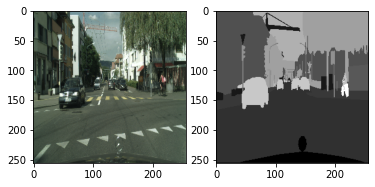

In [11]:
test_pair = train_pairs[2974]
print(test_pair)
test_label = cv.imread(test_pair[0],0)
test_image = plt.imread(test_pair[1])
#print(test_image)

#test_label = load_img(test_pair[0],target_size = (256,256), color_mode = 'grayscale')
#test_image = load_img(test_pair[1],target_size = (256,256))
print(np.unique(test_label))
#Now we resize and check how that looks 
test_label = cv.resize(test_label, (256,256), interpolation = cv.INTER_NEAREST)
test_image = cv.resize(test_image, (256,256), interpolation = cv.INTER_NEAREST)
print('hi, i just wanted a bit of space so that i can read. ty')
#test_label = test_label[:,:,np.newaxis]
#test_label = np.expand_dims(test_label, 2)
print(test_label[200][50])
print(test_label.shape)
print(np.unique(test_label))
"""
n_classes = 30
one_hot = np.zeros((test_label.shape[0], test_label.shape[1], n_classes))
for i, unique_value in enumerate(np.unique(test_label)):
    one_hot[:, :, i][test_label == unique_value] = 1
print(np.unique(one_hot,axis = 2).shape)
"""

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(test_image)
ax2.imshow(np.squeeze(test_label),cmap = 'gray')


In [12]:
#A trial with an implementation using DataGenerators for using the memory more efficiently
class DataGenerator(Sequence):
  #Generates data for the model down the line

  def __init__(self,path_list,batch_size = 32, dims = (256,256,3), shuffle = True):
   #This is define if the data is from the train set or the validation set
   #self.path = path
   self.list_IDs = path_list
   #Define the batch size and if we want to shuffle on each iteration
   self.batch_size = batch_size
   self.shuffle = shuffle
   self.dims = dims
   self.on_epoch_end()
  
  def on_epoch_end(self):
    #Define the things to do at the end of each epoch
    #Generate the path for the data
    self.indexes = np.arange(len(self.list_IDs))
    if(self.shuffle == True):
      np.random.shuffle(self.indexes)

  def __getitem__(self,index):
    #Generate the lists of indices for the batch
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

    #Find the list of IDs for the given batch
    list_IDs_temp = [self.list_IDs[k] for k in indexes]

    #Generate the data
    X,y = self.__data_generation(list_IDs_temp)
    return X,y



  def __len__(self):
    #Return the number of batches per epoch during the training process
    return int(np.floor(len(self.list_IDs) / self.batch_size))

  def __data_generation(self,list_IDs_temp):
    #Generates the data in batches that we specify
    #We begin by taking the dstype_pair and doing some quick pre-processing in every batch

    img_dat = np.zeros((self.batch_size,) + (self.dims[0],self.dims[1]) + (3,), dtype="float32")
    img_mask = np.zeros((self.batch_size,) + (self.dims[0],self.dims[1]) + (1,), dtype="uint8")
    for j,ID_pair in enumerate(list_IDs_temp):
      #We extract the label and image from each pair
      mask = cv.imread(ID_pair[0],0)
      image = cv.imread(ID_pair[1])
      image = image/255.0

      #We resize both so that it fits the input of the ResNet
      mask = cv.resize(mask, (self.dims[0],self.dims[1]), interpolation = cv.INTER_NEAREST)
      image = cv.resize(image, (self.dims[0],self.dims[1]), interpolation = cv.INTER_NEAREST)

      #Now we append the images and the masks to the appropriate location
      img_mask[j] = np.expand_dims(mask,2)
      img_dat[j] = image

    #Return the generated data values 
    return img_dat,img_mask

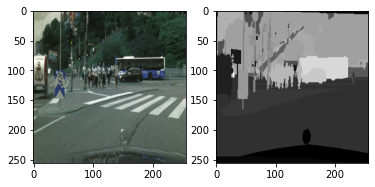

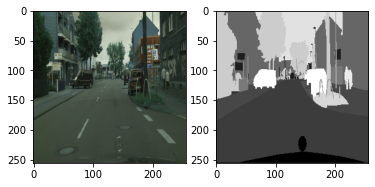

In [13]:
#Define the params for the datagenerator and run a couple of quick sanity checks for debugging
params = {'dims':(256,256,3),
          'batch_size':16,
          'shuffle':True}
train_datagen = DataGenerator(train_pairs,**params)
val_datagen = DataGenerator(val_pairs, **params)

#Just for testing if the data generators were made correctly
testx,testy = train_datagen.__getitem__(5)
valx,valy = val_datagen.__getitem__(0)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(testx[0])
ax2.imshow(np.squeeze(testy[0]), cmap = 'gray')
fig, (ax3,ax4) = plt.subplots(1,2)
ax3.imshow(valx[0])
ax4.imshow(np.squeeze(valy[0]), cmap = 'gray')

In [14]:
for i in range(8):
  print(np.unique(np.squeeze(testy[i])))
  print(len(np.unique(np.squeeze(testy[i]))))

[ 1  2  3  4  5  7  8 11 12 13 15 17 19 20 21 22 23 24 25 26 28 33]
22
[ 1  3  4  6  7  8 11 12 13 17 20 21 23 24 25 33]
16
[ 1  3  8 11 17 23 24 31]
8
[ 1  3  4  7  8 11 15 17 20 21 22 23 25 26 33]
15
[ 1  2  3  4  5  7  8 11 17 19 20 21 22 23 24 25 26 28 33]
19
[ 1  3  4  7  8  9 11 17 19 20 21 23 24 26]
14
[ 1  3  4  7  8 11 17 20 21 22 23 24 26]
13
[ 1  3  4  7  8 11 15 17 20 21 22 23 26]
13


# Getting the Pretrained Model and Setting parameters

In [15]:
#Now we build the model
#We begin by defining the ResNet101 to be used in the netowrk
pre_trained_model = ResNet50(input_shape = (256,256,3),
                             include_top = False,
                             weights = None)

pre_trained_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [16]:
#We plot the model for better clarity
plot_model(pre_trained_model,show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
#Now we take the ouput of the ResNet50 and save it to a vairable
last_pretrained_layer = pre_trained_model.get_layer('conv3_block4_out')
last_output = last_pretrained_layer.output
last_output = layers.Conv2D(filters = 128, kernel_size = (1,1), name = 'Compress_out')(last_output)
last_output.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Compress_out/BiasAdd:0' shape=(None, 32, 32, 128) dtype=float32>>

In [18]:
#Define the params for the pooling module
#This has to be 1/4 times the input channel depth
INPUT_CHANNEL_DEPTH = 128
INPUT_DIM = 32
TARGET_CHANNEL_DEPTH = INPUT_CHANNEL_DEPTH/4
Y_KERNEL_DIM = (INPUT_DIM//2,INPUT_DIM//2)
B_KERNEL_DIM = (INPUT_DIM//4,INPUT_DIM//4)
G_KERNEL_DIM = (INPUT_DIM//8,INPUT_DIM//8)
#Now we define the pyramidal pooling architecture
base = last_output
#Define the GAP with 1*1 block size for 1x1 bin
red_blk = layers.GlobalAvgPool2D(name = 'red_block_pooling')(base)
red_blk = layers.Reshape((1,1,INPUT_CHANNEL_DEPTH))(red_blk)
red_blk = layers.Conv2D(filters = TARGET_CHANNEL_DEPTH,kernel_size = (1,1),name = 'red_1x1_conv')(red_blk)
red_blk = layers.UpSampling2D(size = (256,256),interpolation = 'bilinear', name = 'red_upsample')(red_blk)

#Define the average pooling for the yellow block for 2x2 bin
y_blk = layers.AvgPool2D(pool_size = Y_KERNEL_DIM, name = 'yellow_blk_pooling')(base)
y_blk = layers.Conv2D(filters = TARGET_CHANNEL_DEPTH, kernel_size = (1,1), name = 'yellow_1x1_conv')(y_blk)
y_blk = layers.UpSampling2D(size = (128,128),interpolation = 'bilinear', name = 'yellow_upsample')(y_blk)

#Define the average pooling for the blue block for 4x4 bin
blue_blk = layers.AvgPool2D(pool_size = B_KERNEL_DIM, name = 'blue_blk_pooling')(base)
blue_blk = layers.Conv2D(filters = TARGET_CHANNEL_DEPTH, kernel_size = (1,1), name = 'blue_1x1_conv')(blue_blk)
blue_blk = layers.UpSampling2D(size = (64,64), interpolation = 'bilinear', name = 'blue_upsample')(blue_blk)

#Define the average pooling for the green block for 8x8 bins
green_blk = layers.AvgPool2D(pool_size = G_KERNEL_DIM, name = 'green_blk_pooling')(base)
green_blk = layers.Conv2D(filters = TARGET_CHANNEL_DEPTH, kernel_size = (1,1), name = 'green_1x1_conv')(green_blk)
green_blk = layers.UpSampling2D(size = (32,32), interpolation = 'bilinear', name ='green_upsample')(green_blk)

#Now we upsample the base and check all output shapes to ensure that they match
base = layers.UpSampling2D(size = (256//INPUT_DIM,256//INPUT_DIM), interpolation = 'bilinear', name = 'base_upsample')(base)
print(base.get_shape)
print(red_blk.get_shape)
print(y_blk.get_shape)
print(blue_blk.get_shape)
print(green_blk.get_shape)

#Generate the final output and check shape
PPM = tf.keras.layers.concatenate([base, green_blk, blue_blk, y_blk, red_blk]) 
print(PPM.get_shape)

<bound method Tensor.get_shape of <tf.Tensor 'base_upsample/resize/ResizeBilinear:0' shape=(None, 256, 256, 128) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'red_upsample/resize/ResizeBilinear:0' shape=(None, 256, 256, 32) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'yellow_upsample/resize/ResizeBilinear:0' shape=(None, 256, 256, 32) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'blue_upsample/resize/ResizeBilinear:0' shape=(None, 256, 256, 32) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'green_upsample/resize/ResizeBilinear:0' shape=(None, 256, 256, 32) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'concatenate/concat:0' shape=(None, 256, 256, 256) dtype=float32>>


In [19]:
#Now we define the final convolutional block
output = layers.Conv2D(filters = 35, kernel_size = (3,3), padding = 'same', name = 'final_3x3_conv_blk', activation = 'softmax')(PPM)

In [20]:
#Define the metrics to determine the performance of the model
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

In [21]:
#Compile the model and check summary/plot it
model = models.Model(pre_trained_model.input,output)
model.compile(optimizer = 'adam',
              loss="sparse_categorical_crossentropy",
              metrics = ['acc',iou_coef,dice_coef])


In [22]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [23]:
plot_model(model,show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
#history = model.fit(train_img,train_mask,validation_data = (val_image,val_mask), batch_size = 10, epochs = 20, shuffle = True)
history = model.fit(train_datagen, validation_data = val_datagen, epochs = 30)

Epoch 1/30
 17/185 [=>............................] - ETA: 1:00:56 - loss: 2.5536 - acc: 8.5135e-04 - iou_coef: 11.3198 - dice_coef: 1.8352

In [37]:
#Save the model weights so that I can process them again later
model.save_weights('my_model_weights2.h5')

In [38]:
model.load_weights('my_model_weights2.h5')

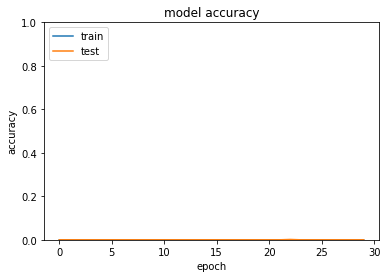

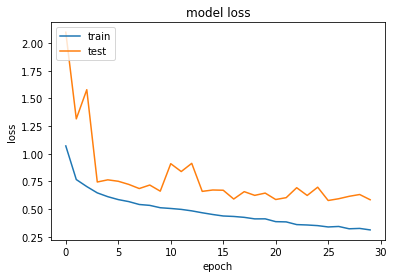

In [39]:
#Display the training metrics over time just for the lulz
fig = plt.gcf()
axs = plt.gca()
axs.set_ylim([0,1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
pred_masks = model.predict(val_datagen)
print(pred_masks.shape)


ResourceExhaustedError: ignored

In [ ]:
def plot_imgs(img,mask,pred):
  fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
  ax1.imshow(img)
  ax1.axis('off')
  ax2.imshow(mask)
  ax2.axis('off')
  ax3.imshow(pred)
  ax3.axis('off')

In [ ]:
#Quick sanity sceck to see if the generated labels are reasonable
x,y = val_datagen.__getitem__(0)
print(x.shape)
print(y.shape)
for i in range(3):
  mask = np.argmax(pred_masks[i], axis=-1)
  mask = np.expand_dims(mask, axis=-1)
  print('Labels in the prediction:',np.unique(mask))
  print('Labels in the ground truth:',np.unique(y[i]))
  plot_imgs(x[i],np.squeeze(y[i]),np.squeeze(mask))

In [ ]:
 from sklearn.metrics import confusion_matrix  
 def compute_iou(y_pred, y_true):
     # ytrue, ypred is a flatten vector
     y_pred = y_pred.flatten()
     y_true = y_true.flatten()
     current = confusion_matrix(y_true, y_pred)
     # compute mean iou
     intersection = np.diag(current)
     ground_truth_set = current.sum(axis=1)
     predicted_set = current.sum(axis=0)
     union = ground_truth_set + predicted_set - intersection
     IoU = intersection / union.astype(np.float32)
     return np.mean(IoU)

In [ ]:
#For each of the 500 images in the validation data-set,
y_true = []
y_pred = []

for i in range(val_datagen.__len__()):
  X,y = val_datagen.__getitem__(i)
  indexes = indexes[index*batch_size:(index+1)*.batch_size]
  